# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def fun(t, x) :
    return x/(t + 1)

x0 = [0.5]
t_span = [0, 10]
sol = solve_ivp(fun, t_span, x0)

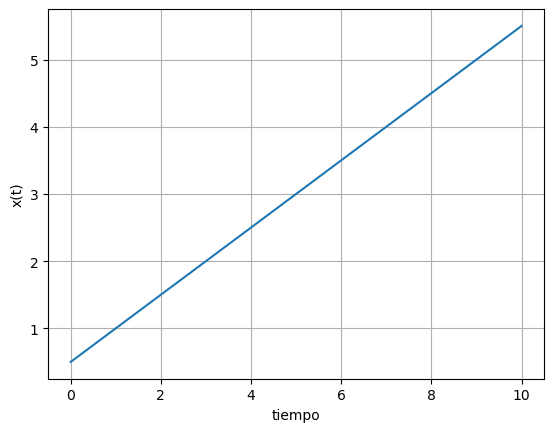

In [49]:
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.xlabel('tiempo')
plt.ylabel('x(t)')
plt.grid()

Grafique con condición inicial $x_0 = 2$

In [50]:
x0_cond_inicial = [2]

In [51]:
sol_cond_inicial = solve_ivp(fun, t_span, x0_cond_inicial)

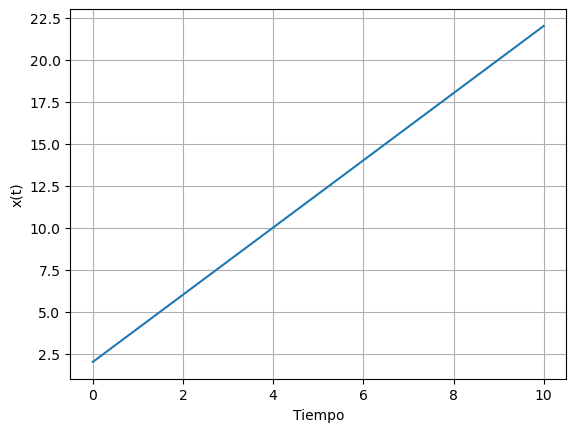

In [52]:
plt.figure()
plt.plot(sol_cond_inicial.t, sol_cond_inicial.y[0])
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [53]:
w0 = 3
def funcion(t, X) :
    dx = X[1]
    x = X[0]
    return [dx, -w0**2 * x]

In [69]:
from scipy.integrate import solve_ivp
t_span = [0, 10]
x0 = [0.5, 0.1]

sol_f = solve_ivp(funcion, t_span, x0, max_step = 0.01)
sol_f

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.99, 10.  , 10.  ])
 t_events: None
        y: array([[0.5       , 0.50077487, 0.50109907, ..., 0.02919897, 0.04419134,
        0.04419134],
       [0.1       , 0.05496175, 0.00987404, ..., 1.50077539, 1.49747258,
        1.49747258]])
 y_events: None

Grafique

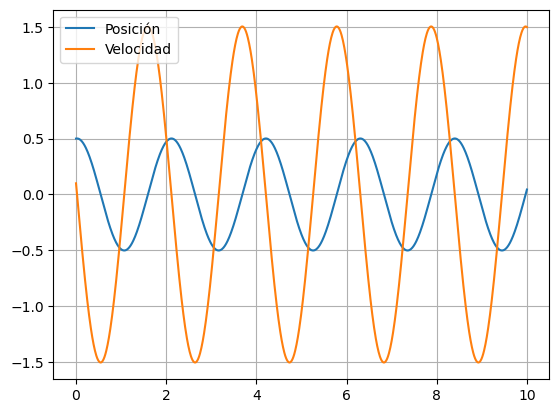

In [72]:
plt.figure()
plt.plot(sol_f.t, sol_f.y[0], label = "Posición")
plt.plot(sol_f.t, sol_f.y[1],  label = "Velocidad")
plt.legend()
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [60]:
def posicion(t, w0) :
    A = 0.5
    B = 0.1/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t) 

def velocidad(t) :
    A = 0.5
    B = 0.1/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [73]:
tiempo = np.linspace(0, 10)
pos = posicion(t, w0)
vel = velocidad(t)

In [84]:
def soluciones(x0, y0, w0, t) :
    tspan = [0, 1]
    y0 = [x0, v0]
    sol2 = solve_ivp(funcion, tspan, y0, max_step = 0.01)
    
    plt.figure()
    plt.plot(sol_f.t, sol_f.y[0], label = "Solución Numérica", lw = 4)
    plt.plot(tiempo, pos, label = "Solución Analítica", lw = 2)
    plt.legend()
    plt.grid() 

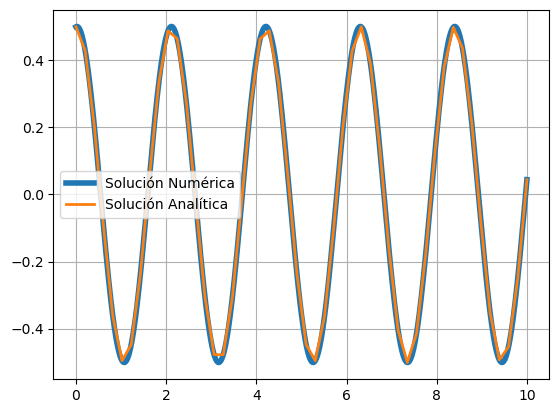

In [87]:
soluciones(0.5, 0.1, 3, 10)